# 6.3 Daten aufbereiten und untersuchen
Begleitung zum Buch Daten- und Prozessanalyse für Fachinformatiker*innen (ISBN 978-3-8362-8112-6)  
Kapitel 6.3, Seiten 328 bis ..

Das Programm hat zwei Hauptmethoden:  

- **process()** gibt die numerischen Entsprechungen aller Zeichen des ursprünglichen Textes nach dem obigen Schema zurück  
- **stats()** die statistische Häufigkeit jedes einzelnen Zeichens angibt (die Indizes des Arrays entsprechen den Zeichencodes, die Werte der jeweiligen Anzahl).

Jede Sequenz anderer Zeichen wird durch genau ein Leerzeichen (und damit den Wert 10) ersetzt.
'1234#;:@#2#45#7' --> '1234 2 45 7'


In [ ]:

import re
  
class CharArray:

    CHAR_MAP = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5,
        '6': 6, '7': 7, '8': 8, '9': 9, ' ': 10,
        'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15,
        'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20,
        'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25,
        'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30,
        'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35,
        'z': 36, 'ä': 37, 'ö': 38, 'ü': 39, 'ß': 40
    }
    EXCLUDE = re.compile('[^0-9 a-zäöüß]+')
    BLANKS = re.compile(' +')

    def normalize(self, text):
        # Kleinschreibung
        text = text.lower()
        # Sonderzeichen ersetzen
        text = self.EXCLUDE.sub(' ', text)
        #print(text)
        # Mehrere Leerzeichen durch eins ersetzen
        text = self.BLANKS.sub(' ', text)
        #print(text)
        return text

    def process(self, text):
        text = self.normalize(text)
        result = [self.CHAR_MAP[char] for char in text]
        return result

    def stats(self, text):
        chars = self.process(text)
        result = [0 for _ in range(0, 41)]
        #print(result)
        for code in chars:
            result[code] += 1
#            print(result)
        return result


if __name__ == '__main__':
    ca = CharArray()
    text = "Für Machine Learning ist es manchmal erforderlich, Textdaten in Zahlen umzuwandeln."
    print(ca.normalize(text))
    print(ca.process(text))
    print(ca.stats(text))



## »Bag of Words« verwenden


In [1]:
# (0,7) 1; (String ID **0**, Wörterliste ID)  Anzahl des Vorkommens im String
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
strings = ["Machine Learning mit Python",
"Mamba, Boa und Python sind bekannte Schlangen",
"Das Leben des Brian von Monty Python Boa Python"]
string_data = np.array(strings)
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(string_data)
print(bag_of_words)
bag_of_words

  (0, 7)	1
  (0, 5)	1
  (0, 9)	1
  (0, 11)	1
  (1, 11)	1
  (1, 8)	1
  (1, 1)	1
  (1, 14)	1
  (1, 13)	1
  (1, 0)	1
  (1, 12)	1
  (2, 11)	2
  (2, 1)	1
  (2, 3)	1
  (2, 6)	1
  (2, 4)	1
  (2, 2)	1
  (2, 15)	1
  (2, 10)	1


<3x16 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

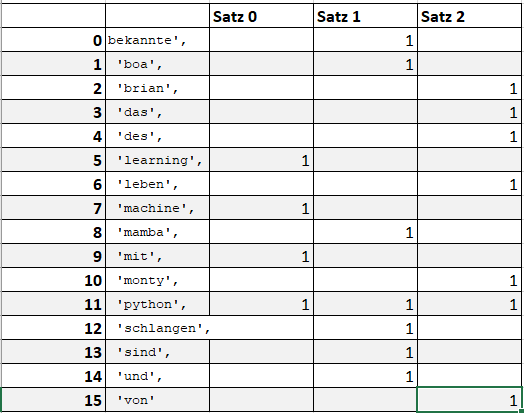

In [ ]:
# Matrix in array umwandeln (Bag of Words Format)
bag_of_words.toarray()

In [ ]:
# Liste der unterschiedlichen Wörter
vectorizer.get_feature_names_out()


Link zu deutschen Stoppwords  
https://countwordsfree.com/stopwords/german


In [ ]:
# Stopwords für deutschen Text
stop = ["das", "des", "mit", "sind", "und", "von"]
vectorizer2 = CountVectorizer(stop_words = stop)
bag_of_words = vectorizer2.fit_transform(string_data)
bag_of_words.toarray()

In [ ]:
# Liste der unterschiedlichen Wörter
vectorizer2.get_feature_names_out()


In [ ]:
vectorizer3 = CountVectorizer(stop_words = stop)
print((vectorizer3.fit_transform(string_data)))

- Machine Learning mit Python
- Mamba, Boa und Python sind bekannte Schlangen
- Das Leben des Brian von Monty Python Boa

In [ ]:
# Mit Schwellenwert für häufiger vorkommenden Wörtern max_df = 0.9
# Das Auftreten des eines Wortes in den jeweiligen Sätzen bestimmt 100% (1.0)
# strings = ["Machine Learning mit Python",
#            "Mamba, Boa und Python sind bekannte Schlangen",
#            "Das Leben des Brian von Monty Python Boa Python",
#            "Python ist einfach zu erlernen"]
strings = ["Machine Learning mit Python",
           "Mamba, Boa und Python sind bekannte Schlangen",
           "Das Leben des Brian von Monty Python Boa Python"]
string_data = np.array(strings)
stop = ["das", "des", "mit", "sind", "und", "von", "zu", "ist"]
vectorizer3 = CountVectorizer(stop_words = stop, max_df=1.0)   # alle Wörter
#vectorizer3 = CountVectorizer(stop_words = stop, max_df=1.0, binary=True)   # alle Wörter mehrfaches auftreten wird mit 1 angezeigt!
#vectorizer3 = CountVectorizer(stop_words = stop, max_df=.49)   # Test für 4 Sätze --> Verschiebung der 100% auf 4!
#vectorizer3 = CountVectorizer(stop_words = stop, max_df=.5)   # Test für 4 Sätze --> Verschiebung der 100% auf 4!
#vectorizer3 = CountVectorizer(stop_words = stop, max_df=0.666) # 'boa' ist raus
#vectorizer3 = CountVectorizer(stop_words = stop, max_df=0.667) # 'boa' ist drin
#vectorizer3 = CountVectorizer(stop_words = stop, min_df=0.33) # alle Wörter (1 mal oder mehrfach vorkommen)
#vectorizer3 = CountVectorizer(stop_words = stop, min_df=0.34) # alle Wörter die oder mehrfach vorkommen (>1/3)
#vectorizer3 = CountVectorizer(stop_words = stop, min_df=0.6667) # alle Wörter die 3 mal vorkommen (>2/3)
#vectorizer3 = CountVectorizer(stop_words = stop, min_df=0.34, max_df=.667) # Bereich festlegen (1/3 > x > 2/3 --> 2 mal vorkommen)

bag_of_words = vectorizer3.fit_transform(string_data)
print(vectorizer3)
print(bag_of_words.toarray())
print(len(bag_of_words.toarray()[0]))
vectorizer3.get_feature_names_out()

10: 'bekannte', 'boa', 'brian', 'learning', 'leben', 'machine', 'mamba', 'monty', 'python', 'schlangen'


In [ ]:
# Liste der unterschiedlichen Wörter
vectorizer3.get_feature_names_out()

## Wortfolgen codieren

In [ ]:
strings = ["Machine Learning mit Python",
           "Mamba, Boa und Python sind bekannte Schlangen",
           "Das Leben des Brian von Monty Python Boa Python"]
string_data = np.array(strings)
stop = ["das", "des", "mit", "sind", "und", "von", "zu", "ist"]
#vectorizer4 = CountVectorizer(stop_words = stop, ngram_range = (3, 3)) # Trigramme
vectorizer4 = CountVectorizer(stop_words = stop, ngram_range = (2, 2)) # Bigramme 
bigrams = vectorizer4.fit_transform(string_data)
bigrams.toarray()

In [ ]:
list(enumerate(vectorizer4.get_feature_names_out()))

In [ ]:
with open('sample_neu.txt', 'r', encoding="utf-8") as text_file:
    ltext = list(text_file)
print(ltext)

In [ ]:
text_data = np.array(ltext)
#print(text_data)
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(text_data)
#bag_of_words.toarray()

In [ ]:
z = 0
#print(len(vectorizer.get_feature_names_out()))
for i in (vectorizer.get_feature_names_out()):
    print(i, end=' ; ')
    z += 1
print(f'\n\nAnzahl in Bag of Words : {z}')

In [ ]:
# Stoppwords
stop = ["der", "die", "das", "des", "dem", "den", "oder", "aber", "auch", "ist", "hat", "mit", "sind", "und", "von",
        "ab", "alle", "an", "auf", "aus", "da", "ein", "es", "den", "für", "in", "nur", "ob", "of", "sie", "um", "vom",
        "zu", "um" ]
vectorizer1 = CountVectorizer(stop_words = stop)
bag_of_words = vectorizer1.fit_transform(text_data)
z = 0
for i in (vectorizer1.get_feature_names_out()):
    print(i, end=' ; ')
    z += 1
print(f'\n\nAnzahl in Bag of Words mit Stop-Words : {z}')

In [ ]:
vectorizer2 = CountVectorizer(stop_words = stop, min_df = 0.12) # Wörter die mehr als 1x auftreten (>1/9)
#vectorizer2 = CountVectorizer(stop_words = stop, max_df = 0.12) # Wörter die nur 1 x auftreten (>1/9)
bag_of_words = vectorizer2.fit_transform(text_data)
#bag_of_words.toarray()
z = 0
for i in (vectorizer2.get_feature_names_out()):
    print(i, end=' ; ')
    z += 1
print(f'\n\nAnzahl in Bag of Words mit Stop-Words, df : {z}')

In [ ]:
vectorizer3 = CountVectorizer(stop_words = stop, ngram_range = (3, 3))
bigrams = vectorizer3.fit_transform(text_data)
bigrams.toarray()
z = 0
for i in (vectorizer3.get_feature_names_out()):
    print(i, end=' ; ')
    z += 1
print(f'\n\nAnzahl in BiGramm mit Stop-Words : {z}')

## Längere Texte mit dem HashingVectorizer zusammenfassen

In [ ]:
texts = [
"""Künstliche Intelligenz ist eine Sammelbezeichnung für Algorithmen,
die Probleme lösen, für die Menschen Intelligenz benötigen. Ob man
die Programme selbst als intelligent ansehen kann, ist umstritten.
typische Lösungen gehören zum Gebiet des Machine Learning, bei dem
der Algorithmus aus den vorliegenden Daten lernt, wie sie zu
interpretieren sind.""",
"""Beim Machine Learning, einem wichtigen Teilgebiet der künstlichen
Intelligenz, unterscheidet man zwischen überwachtem und unüberwachtem
Lernen - je nachdem, ob der Algorithmus zuerst mit Trainingsdaten
gewissermaßen kalibriert wird, oder ob man ihn gleich auf die echten
Daten loslässt.""",
"""Die bekannten Forscher und Buchautoren Russell und Norvig teilen
künstliche Intelligenz in vier verschiedene Felder ein: Menschliches
Denken, menschliches Handeln, rationales Denken und rationales Handeln.
Typische Algorithmen im Machine Learning gehören dabei am ehesten zum
rationalen Denken.""",
"""Seit Jahrhunderten streitet sich die Forschung darüber, ob menschliche
Intelligenz angeboren ist, durch Erziehung und Bildung erworben wird,
oder ob es sich um eine Mischung aus beidem handelt. Die beliebten
IQ-Tests sind jedenfalls nur sehr bedingt geeignet, ein echtes Maß für
menschliche Intelligenz zu bilden, denn das Abschneiden in diesen Tests
lässt sich gezielt trainieren."""]

In [ ]:
texts

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
import numpy as np
text_data = np.array(texts)
hv = HashingVectorizer(n_features = 10)
features = hv.transform(text_data)
print(features)
features


In [ ]:
features.toarray()

## Bilddaten aufbereiten

In [ ]:
from skimage.io import imread, imshow
image = imread("schnecke.jpg", as_gray = True)
imshow(image)

In [ ]:
# Dimensionen des Bildes
image.shape

In [ ]:
# Ausschnitt des Bildes
cropped = image[250:750, 150:650]
imshow(cropped)

https://scikit-image.org/docs/stable/api/api.html.


In [ ]:
from skimage import exposure
contrast = exposure.adjust_log(cropped)
imshow(contrast)

In [ ]:
from skimage import feature
edges = feature.canny(contrast, sigma=3)
imshow(1 - edges)

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

cv = chan_vese(contrast, mu=0.25, lambda1=1, lambda2=1, tol=1e-3,
               dt=0.5, init_level_set="checkerboard",
               extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

In [ ]:
from skimage.transform import resize
resized = resize(contrast, (50, 50))
imshow(resized)

In [ ]:
resized2 = resize(contrast, (20, 20))
imshow(resized2)


Seite 342